# TEXT CLASSIFICATION USING NAIVE BAYES

Hi, here we will be building a simple text classifier using the Naive Bayes Algorithm + the confusion matrix.
Moreover we will also be fine-tuning it on the go for better accuracy at the end.
### What is Naive Bayes Algorithm ?
This alogrithm is based on the Baye's Algorithm from the  probability theory.

Formula : $P((C|X) = P(C).P(X|C))/P(X)$

H -> Class,
D -> Text

Naive Baye's algorithm assumes every word in independent in a particular class.
Now, if every word is independent then :

 $P(X|C) = P(x1, x2,...,xn|C) = P(X1|C)P(X2|C)...P(Xn|C) $

 We put this assumption in the Naive Baye's Formula we get :


$P((C|X) = P(C)∏(n,i=1)P(xi|C))$

Hence, to predict we use the most probable class of an input by computing the probability of each class and selecting the one with the highest probability. We have a formula

$Most Probable Class =argmaxP(C)∏(i=1,n)P(Xi|C)$


Now, let's start coding to get the idea how this works.

In [1]:
%pip install -U spacy==3.*
!python -m spacy download en_core_web_sm
!python -m spacy info

Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 5.6 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.8 MB 5.9 MB/s eta 0:00:02
     ----------- ---------------------------- 3.7/12.8 MB 6.8 MB/s eta 0:00:02
     ------------------ --------------------- 5.8/12.8 MB 7.8 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 8.7 MB/s eta 0:00:01
     ----------------------------------- ---- 11.3/12.8 MB 9.8 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 9.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')

============================== Info about spaCy ==============================

spaCy version    3.8.4                         
Location         c:\Users\KIIT0001\AppData\Local\Programs\Python\Python312\Li

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacy

from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import fetch_20newsgroups
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [3]:
train_corpus = fetch_20newsgroups(subset = "train")

In [4]:
print("Training data size : {}".format(len(train_corpus.data)))

Training data size : 11314


In [5]:
train_corpus.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [7]:
print(train_corpus.target)

[7 4 4 ... 3 1 8]


In [8]:
# first post along with the corresponding label
print(train_corpus.data[0])

print("Label no. {}".format(train_corpus.target[0]))
print("Label name : {}".format(train_corpus.target_names[0]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Label no. 7
Label name : alt.atheism


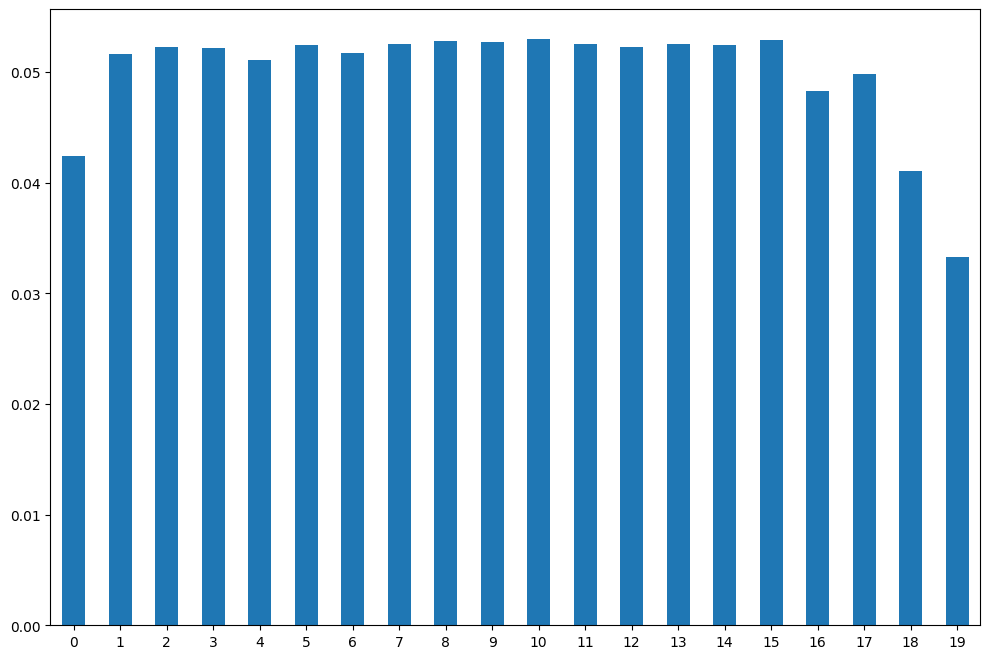

In [9]:
bins, counts = np.unique(train_corpus.target, return_counts=True)
freq_series = pd.Series(counts/len(train_corpus.data))
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_xticklabels(bins, rotation=0)
plt.show()

In [10]:
train_data, val_data, train_target, val_target = train_test_split(train_corpus.data, train_corpus.target, train_size= 0.8,random_state= 1)
print("training data size : {}".format(len(train_data)))
print("validation data size : {}".format(len(val_data)))

training data size : 9051
validation data size : 2263


In [11]:
nlp = spacy.load("en_core_web_sm")

In [12]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [13]:
nlp = spacy.blank('en')
nlp.pipe_names

[]

In [14]:
def spacy_tokenizer(doc):
 return [t.text for t in nlp(doc) if(not t.is_punct and not t.is_space and t.is_alpha)]

In [ ]:
#vectorize using TfIdfVectorizer
%time
vectorizer = TfidfVectorizer()
train_feature_vec = vectorizer.fit_transform(train_data)

UsageError: Line magic function `%%time` not found.


In [19]:
nb_classifier = MultinomialNB()
nb_classifier.fit(train_feature_vec, train_target)
nb_classifier.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [20]:
#use F1 for measuring the accurancy
train_preds = nb_classifier.predict(train_feature_vec)
print("Initial F1 score {}".format(metrics.f1_score(train_target, train_preds, average = "macro")))

Initial F1 score 0.9157984242661206


In [21]:
# removing headers, footers and quotes from training set and resplit
filtered_training_corpus = fetch_20newsgroups(subset= "train", remove=('headers', 'footers', 'quotes'))
train_data, val_data, train_label, val_label = train_test_split(filtered_training_corpus.data, filtered_training_corpus.target, train_size= 0.8, random_state= 1)

In [24]:
%%time
train_feature_vec = vectorizer.fit_transform(train_data)
nb_classifier.fit(train_feature_vec, train_label)

CPU times: total: 1.77 s
Wall time: 1.99 s


MultinomialNB()

In [26]:
train_preds = nb_classifier.predict(train_feature_vec)
print("F1 score of filtered training set : {}".format(metrics.f1_score(train_label, train_preds, average="macro")))

F1 score of filtered training set : 0.7986320180382409


In [28]:
# checking how the classifier performs on the validation set
# first vectorize the validation data
%time
val_feature_vec = vectorizer.transform(val_data)

CPU times: total: 0 ns
Wall time: 0 ns


In [29]:
val_pred = nb_classifier.predict(val_feature_vec)
print("F1 score of filtered validation set : {}".format(metrics.f1_score(val_label,val_pred, average="macro")))

F1 score of filtered validation set : 0.6190558954971659


# Confusion Matrix


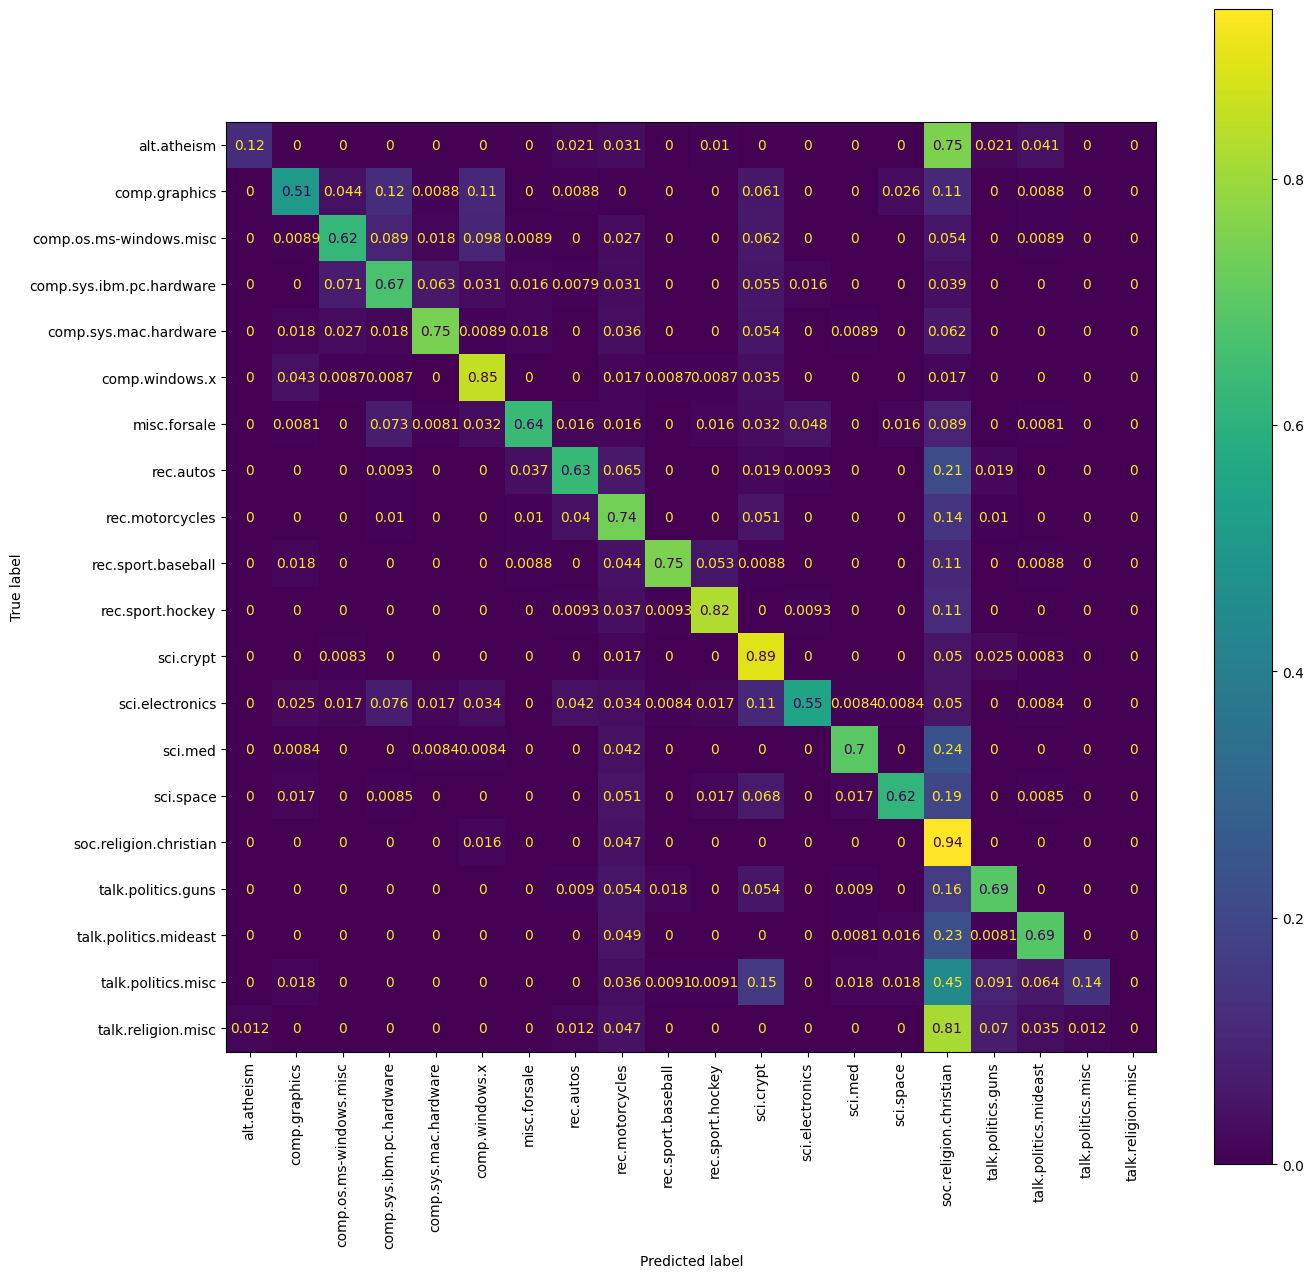

In [30]:
# Set the size of the plot.
fig, ax = plt.subplots(figsize=(15, 15))

# Create the confusion matrix.
disp = ConfusionMatrixDisplay.from_estimator(nb_classifier, val_feature_vec, val_label, normalize='true', display_labels=filtered_training_corpus.target_names, xticks_rotation='vertical', ax=ax)

In [31]:
# looking at the precision and recall
print(metrics.classification_report(val_label, val_pred, target_names = filtered_training_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.12      0.22        97
           comp.graphics       0.75      0.51      0.61       114
 comp.os.ms-windows.misc       0.77      0.62      0.69       112
comp.sys.ibm.pc.hardware       0.64      0.67      0.65       127
   comp.sys.mac.hardware       0.85      0.75      0.80       112
          comp.windows.x       0.72      0.85      0.78       115
            misc.forsale       0.88      0.64      0.74       124
               rec.autos       0.79      0.63      0.70       108
         rec.motorcycles       0.49      0.74      0.59        99
      rec.sport.baseball       0.93      0.75      0.83       113
        rec.sport.hockey       0.86      0.82      0.84       108
               sci.crypt       0.55      0.89      0.68       120
         sci.electronics       0.87      0.55      0.67       119
                 sci.med       0.91      0.70      0.79       119
         

c:\Users\KIIT0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KIIT0001\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [32]:
print("Training data size : {}".format(len(train_data)))
print("No. of training features : {}".format(len(train_feature_vec[0].toarray().flatten())))

Training data size : 9051
No. of training features : 89231


In [33]:
nlp = spacy.load("en_core_web_sm")


In [35]:
not_needed = ['ner', 'parser']

# remove the stop words and add lemma instead of token text
def spacy_tokenizer(doc):
 with nlp.disable_pipes(*not_needed):
    return [ t.lemma_ for t in nlp(doc) if(not t.is_punct and not t.is_space and not t.is_stop and t.is_alpha) ]

In [ ]:
# again revectorize
%time
vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
train_feature_vec = vectorizer.fit_transform(train_data)

In [36]:
print("number of features now : {}".format(len(train_feature_vec[0].toarray().flatten())))
#hence the no. of unnecessary features have reduced

number of features now : 42803


In [38]:
nb_classifier.fit(train_feature_vec,train_label)
train_preds = nb_classifier.predict(train_feature_vec)
print("training F1 score with fewer features : {}".format(metrics.f1_score(train_label, train_preds,average= "macro")))


training F1 score with fewer features : 0.839229137359691


In [40]:
#checking classifier performance on validation set
%%time
val_feature_vec = vectorizer.transform(val_data)

CPU times: user 49.8 s, sys: 933 ms, total: 50.7 s
Wall time: 52.5 s


In [42]:
val_pred = nb_classifier.predict(val_feature_vec)
print("Validation score with fewer features : {}".format(metrics.f1_score(val_label, val_pred, average="macro")))

Validation score with fewer features : 0.673409559015635


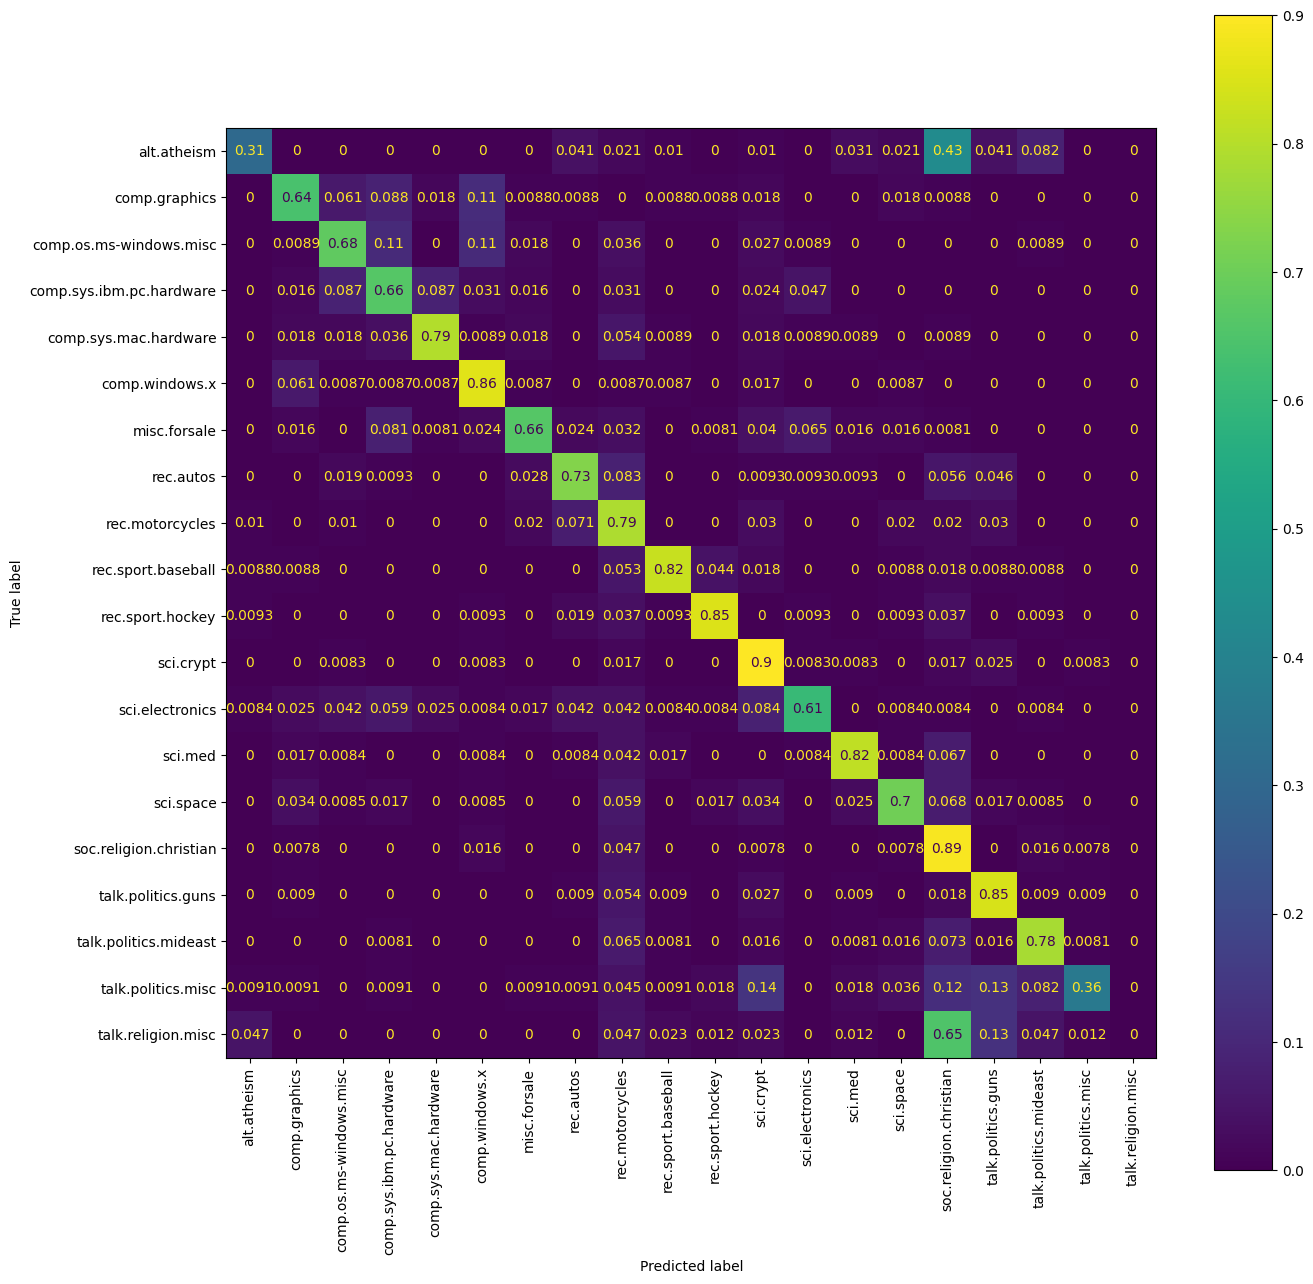

In [43]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay.from_estimator(nb_classifier, val_feature_vec, val_label, normalize='true', display_labels=filtered_training_corpus.target_names, xticks_rotation='vertical', ax=ax)

In [45]:
print(metrics.classification_report(val_label, val_pred, target_names=filtered_training_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.77      0.31      0.44        97
           comp.graphics       0.73      0.64      0.68       114
 comp.os.ms-windows.misc       0.70      0.68      0.69       112
comp.sys.ibm.pc.hardware       0.63      0.66      0.65       127
   comp.sys.mac.hardware       0.83      0.79      0.81       112
          comp.windows.x       0.71      0.86      0.78       115
            misc.forsale       0.84      0.66      0.74       124
               rec.autos       0.76      0.73      0.75       108
         rec.motorcycles       0.47      0.79      0.59        99
      rec.sport.baseball       0.88      0.82      0.85       113
        rec.sport.hockey       0.88      0.85      0.86       108
               sci.crypt       0.64      0.90      0.75       120
         sci.electronics       0.78      0.61      0.68       119
                 sci.med       0.86      0.82      0.84       119
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
# alpha values
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0,],}

# Instantiate the search with the model we want to try and fit it on the training data.
multinomial_nb_grid = model_selection.GridSearchCV(MultinomialNB(), param_grid=params, scoring='f1_macro', n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(train_feature_vec, train_label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='f1_macro', verbose=5)

In [48]:
print('Best parameter value(s): {}'.format(multinomial_nb_grid.best_params_))

Best parameter value(s): {'alpha': 0.01}


In [53]:
best_nb_classifier = multinomial_nb_grid.best_estimator_
val_pred = best_nb_classifier.predict(val_feature_vec)
print('Validation F1 score with fewer features: {}'.format(metrics.f1_score(val_label, val_pred, average='macro')))

Validation F1 score with fewer features: 0.7343805683794756


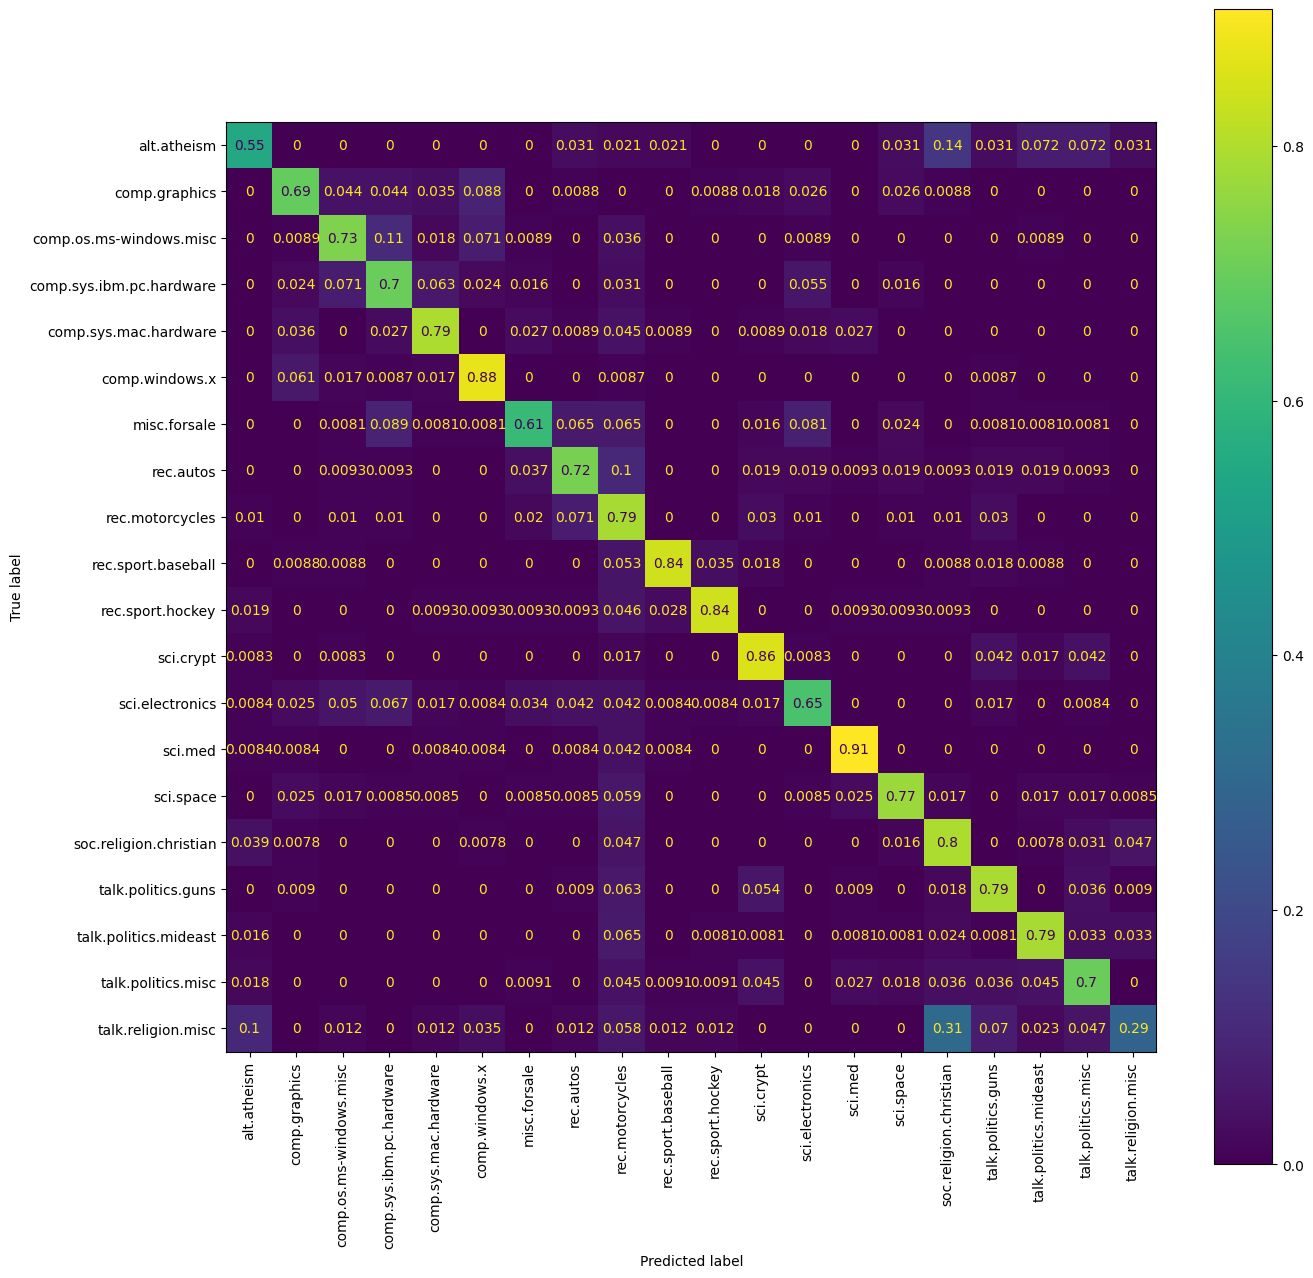

In [54]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = ConfusionMatrixDisplay.from_estimator(best_nb_classifier, val_feature_vec, val_label, normalize='true', display_labels=filtered_training_corpus.target_names, xticks_rotation='vertical', ax=ax)

In [56]:
print(metrics.classification_report(val_label, val_pred, target_names=filtered_training_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.69      0.55      0.61        97
           comp.graphics       0.76      0.69      0.72       114
 comp.os.ms-windows.misc       0.73      0.73      0.73       112
comp.sys.ibm.pc.hardware       0.67      0.70      0.69       127
   comp.sys.mac.hardware       0.79      0.79      0.79       112
          comp.windows.x       0.78      0.88      0.82       115
            misc.forsale       0.80      0.61      0.69       124
               rec.autos       0.72      0.72      0.72       108
         rec.motorcycles       0.45      0.79      0.57        99
      rec.sport.baseball       0.90      0.84      0.87       113
        rec.sport.hockey       0.91      0.84      0.88       108
               sci.crypt       0.80      0.86      0.83       120
         sci.electronics       0.73      0.65      0.69       119
                 sci.med       0.89      0.91      0.90       119
         

# Creating Our Final Naive Baye's Classifier

In [57]:
text_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=spacy_tokenizer)),
    ('classifier', MultinomialNB(alpha = 0.01))
])

In [58]:
%%time
text_classifier.fit(filtered_training_corpus.data, filtered_training_corpus.target)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 4min 7s, sys: 5.1 s, total: 4min 12s
Wall time: 4min 22s


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function spacy_tokenizer at 0x7d7bb84ec720>)),
                ('classifier', MultinomialNB(alpha=0.01))])

In [59]:
filtered_test_corpus = fetch_20newsgroups(subset="test", remove=('headers', 'footers', 'quotes'))

In [60]:
test_pred = text_classifier.predict(filtered_test_corpus.data)

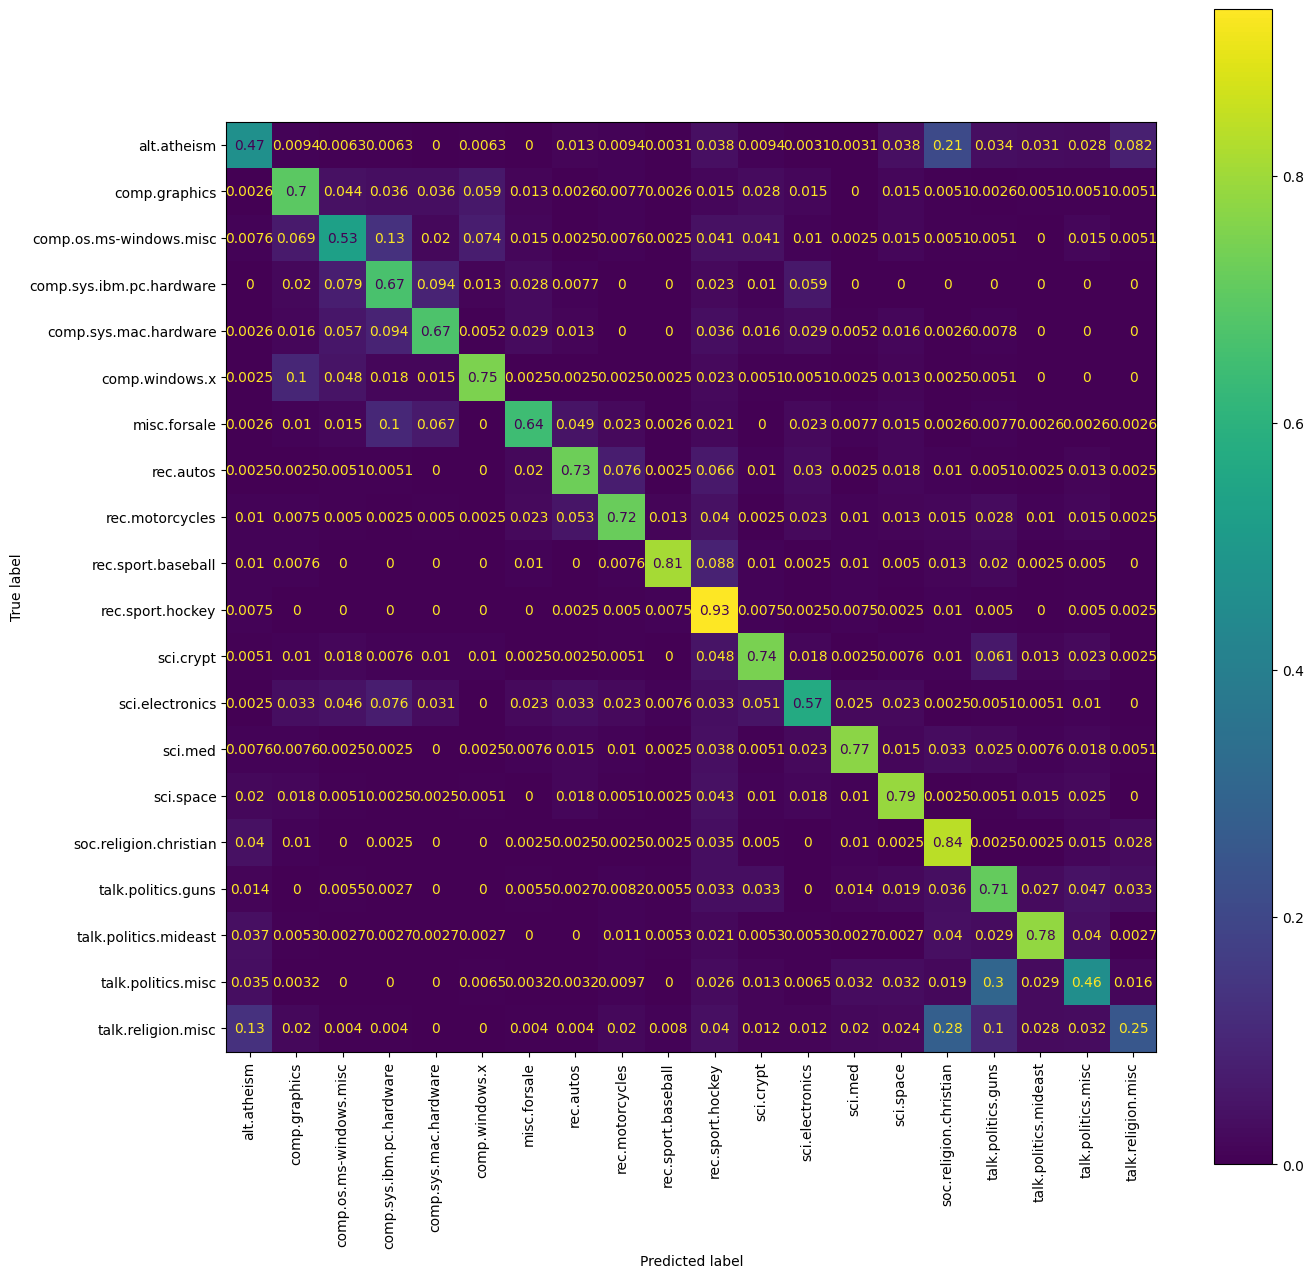

CPU times: user 2.07 s, sys: 36.5 ms, total: 2.1 s
Wall time: 3.33 s


In [62]:
%%time
fig, ax = plt.subplots(figsize=(15, 15))
ConfusionMatrixDisplay.from_predictions(filtered_test_corpus.target, test_pred, normalize='true', display_labels=filtered_test_corpus.target_names, xticks_rotation='vertical', ax=ax)
plt.show()

In [64]:
print(metrics.classification_report(filtered_test_corpus.target, test_pred, target_names=filtered_test_corpus.target_names))

                          precision    recall  f1-score   support

             alt.atheism       0.57      0.47      0.52       319
           comp.graphics       0.67      0.70      0.68       389
 comp.os.ms-windows.misc       0.61      0.53      0.57       394
comp.sys.ibm.pc.hardware       0.57      0.67      0.62       392
   comp.sys.mac.hardware       0.70      0.67      0.69       385
          comp.windows.x       0.80      0.75      0.78       395
            misc.forsale       0.77      0.64      0.70       390
               rec.autos       0.77      0.73      0.75       396
         rec.motorcycles       0.77      0.72      0.74       398
      rec.sport.baseball       0.93      0.81      0.86       397
        rec.sport.hockey       0.58      0.93      0.72       399
               sci.crypt       0.74      0.74      0.74       396
         sci.electronics       0.67      0.57      0.62       393
                 sci.med       0.84      0.77      0.80       396
         

In [72]:
def classify_text(clf, doc, labels=None):
  probas = clf.predict_proba([doc]).flatten()
  max_proba_idx = np.argmax(probas)

  if labels:
    most_proba_class = labels[max_proba_idx]
  else:
    most_proba_class = max_proba_idx

  return (most_proba_class, probas[max_proba_idx])

In [73]:
# Post from r/medicine.
s = "Hello everyone so am doing my thesis on Ischemic heart disease have been using online articles and textbooks mostly Harrisons internal med. could u recommended me some source specifically books where i can get more about in depth knowledge on IHD."
classify_text(text_classifier, s, filtered_test_corpus.target_names)

('sci.med', np.float64(0.7210299189355043))

In [74]:
# Post from r/space.
s = "First evidence that water can be created on the lunar surface by Earth's magnetosphere. Particles from Earth can seed the moon with water, implying that other planets could also contribute water to their satellites."
classify_text(text_classifier, s, filtered_test_corpus.target_names)

('sci.space', np.float64(0.9670411415255361))